<a href="https://colab.research.google.com/github/edenlum/projecteuler/blob/main/Cardano_Triplets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://projecteuler.net/problem=251

<p>
A triplet of positive integers $(a, b, c)$ is called a Cardano Triplet if it satisfies the condition:</p>
$$\sqrt[3]{a + b \sqrt{c}} + \sqrt[3]{a - b \sqrt{c}} = 1$$

<p>
For example, $(2,1,5)$ is a Cardano Triplet.
</p>
<p>
There exist $149$ Cardano Triplets for which $a + b + c \le 1000$.
</p>
<p>
Find how many Cardano Triplets exist such that $a + b + c \le 110\,000\,000$.
</p>

Given some $a$, call $b\sqrt{c}$ = x and solve for x: $$x = \frac{(1 + a) \sqrt{8 a - 1}}{3 \sqrt{3}}$$

Notice that $x$ is not an integer necessarily but $x^2$ is. So $$x^2 = \frac{(1 + a)^2 (8 a - 1)}{27}$$ is an integer.

So $(1+a)^2(8a-1) = 0 \mod 27$. This means that:
1. $(a+1) = 0 \mod 3$ and $(8a-1) = 0 \mod 3$
2. $(a+1) = 0 \mod 9$
3. $(8a-1) = 0 \mod 27$

Let's analyze:
1. $a = 3k + 2$ and therefore $8a = 24k+16 = 1 \mod 3$ so the other condition applies immediately.
2. $a = 9k + 8$ which is a subset of the first condition.
3. $8a = 1 \mod 27 \to 8 * (a\mod 27) \mod 27 = 1 \to a = 17 \mod 27$. This is also a subset of the first condition.

Let's plot it $x(a)$:

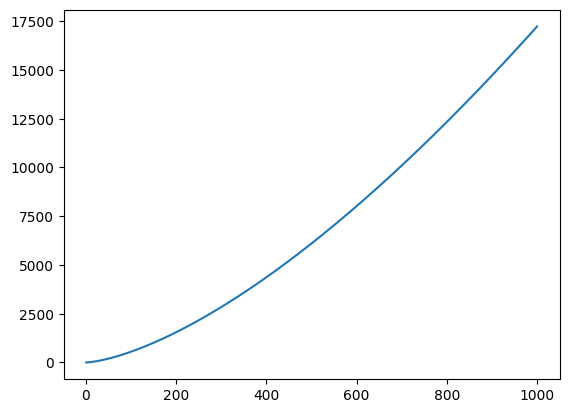

In [1]:
from matplotlib import pyplot as plt
import numpy as np

limit = 1000
a = np.linspace(1, limit, 1000)
x = (1 + a) * np.sqrt(8 * a - 1) / (3 * np.sqrt(3))
plt.plot(a, x)
plt.show()

Find the upper limit to search for a. Given $a$ we calculate $x = b\sqrt{c}$. We know that $c = x^2/b^2$, and we need to find the min of $b+c = b+x^2/b^2$.

Finding the derivative w.r.t $b$: $$1 - \frac{2x^2}{b^3} = 0 \Rightarrow b^3 = 2x^2$$

$a_{max} = \text{limit} - b_{min} - c_{min} = \text{limit} - (2x^2)^{1/3} - x^2/(2x^2)^{2/3}$

Let's solve for $a$:

In [2]:
import sympy as sp

def find_limit_a(limit):
    a = sp.Symbol('a')
    x = (1 + a) * sp.sqrt(8 * a - 1) / (3 * sp.sqrt(3))
    b_min = (2 * x**2)**(1/3)
    c_min = x**2/(2 * x**2)**(2/3)
    limit_a = limit - b_min - c_min
    formula = sp.solve(a - limit_a, a)[0]
    # evaluate
    return int(float(formula))

find_limit_a(110_000_000)

48674266

Given that we know $x$, $x^2 = b^2c$ is an integer. We need to find all factors of it that are squares and then $b=\sqrt{\text{square factor}}, c=x^2/b^2$.

In [40]:
import itertools
from sympy import factorint

def all_subsets(s):
    return itertools.chain.from_iterable(itertools.combinations(s, r) for r in range(len(s)+1))

def all_squares(even_factors_count):
    factors = []
    for k, v in even_factors_count.items():
        factors += [k] * v
    for subset in set(all_subsets(factors)):
        product = 1
        for factor in subset:
            product *= factor
        yield product

def all_squares_len(N):
    even_factors_count = {k: v//2 for k,v in factorint(N).items() if v//2 > 0}
    factors = []
    for k, v in even_factors_count.items():
        factors += [k] * v
    return len(set(all_subsets(factors)))


In [43]:
import math
from sympy import factorint

# Function to check if a given number is close to a perfect square
def is_close_to_integer(n):
    return abs(n - round(n)) < 1e-9

# Function to find Cardano Triplets using factorization of d^2
def find_cardano_triplets_with_factors(limit):
    triplets = 0

    def check(a, b, c):
        f = (a + b * math.sqrt(c)) ** (1/3) - abs(a - b * math.sqrt(c)) ** (1/3)
        if abs(f-1) > 1e-9:
            print(f"f TOO BIG")
        if a + b + c <= limit:
            triplets.append((a, b, c))
            print(f"Found triplet: a={a}, b={b}, c={c}")
        else:
            print(f"Triplet exceeds limit: a={a}, b={b}, c={c}")

    # Iterate over potential values of a
    for a in range(2, limit, 3):
        # Calculate d
        d1 = (1+a)//3
        d2 = (8*a-1)//3
        factors_squared = factorint(d1)
        for factor, count in factorint(d2).items():
            if count//2>0:
                factors_squared[factor] = factors_squared.get(factor, 0) + count//2
        # print(factors_squared)
        for b in all_squares(factors_squared):
            # print(b)
            # print(a, b, (d1*d1*d2)//(b*b))
            if limit >= a + b + (d1*d1*d2)//(b*b):
                triplets += 1
        # total = 1
        # for factor, count in factors_squared.items():
        #     total *= (count+1)
        # print(a, (a+1)//3, (8*a-1)//3, total)
        # triplets += total

    return triplets

# Find Cardano Triplets with a + b + c <= 110,000,000
limit = 1000
triplets = find_cardano_triplets_with_factors(limit)

triplets

KeyboardInterrupt: 

In [6]:
(2 + math.sqrt(5))** (1/3)

1.618033988749895

In [23]:
(2 - math.sqrt(5)) **(1./3)

(0.30901699437494756+0.535233134659635j)

25
81
2025
1
9
225


225